<a href="https://colab.research.google.com/github/zoehendershot/DS-1002/blob/main/Copy_of_06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [13]:
import pandas as pd
!pip3 install seaborn
!pip install seaborn
import seaborn as sns

---

In [14]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [15]:
series = pd.Series(list)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [22]:
series.index = range(2, len(series) * 3 + 2, 3)
print(series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [4]:
data = {'Name': ['Elise', 'Daniel', 'Lauren', 'Charles'],
        'Age': [28, 31, 32, 37],
        'Career': ['Artist', 'Doctor', 'Statistician', 'Lawyer']}
df = pd.DataFrame(data)
print(df)


      Name  Age        Career
0    Elise   28        Artist
1   Daniel   31        Doctor
2   Lauren   32  Statistician
3  Charles   37        Lawyer


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [5]:
df.index.name = 'participant_id'
print(df)

                   Name  Age        Career
participant_id                            
0                 Elise   28        Artist
1                Daniel   31        Doctor
2                Lauren   32  Statistician
3               Charles   37        Lawyer


6. Use a pandas function to determine the data types of the columns of `df`.

In [23]:
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [7]:
print(df['Name'])

participant_id
0      Elise
1     Daniel
2     Lauren
3    Charles
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [8]:
print(df.Name)

participant_id
0      Elise
1     Daniel
2     Lauren
3    Charles
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [9]:
print(df[['Name']])

                   Name
participant_id         
0                 Elise
1                Daniel
2                Lauren
3               Charles


9. Show the 3rd element in column `career`.

In [10]:
print(df['Career'][2])

Statistician


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [16]:
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [29]:
iris.corr()
correlation = iris[['sepal_length','sepal_width']].corr()
print(correlation)

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


<ipython-input-29-5e3a029b92e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [31]:
correlation_species = iris.groupby('species')['sepal_length', 'sepal_width'].corr().iloc[0::2, -1].unstack()
max_correlation_species = correlation_species.idxmax()
print(max_correlation_species)

sepal_length    setosa
dtype: object


<ipython-input-31-1014f4f29e6d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_species = iris.groupby('species')['sepal_length', 'sepal_width'].corr().iloc[0::2, -1].unstack()


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [51]:
group_species = iris.groupby('species')

correlation_species = group_species.corr().unstack()

# Get the pair of variables with the least positive correlation coefficient for each species
least_positive_correlation_species = correlation_species.groupby('species').apply(lambda x: x.unstack().sort_values().head(2))

print(least_positive_correlation_species)


species                                 species   
setosa      sepal_width   petal_length  setosa        0.177700
            petal_length  sepal_width   setosa        0.177700
versicolor  sepal_length  sepal_width   versicolor    0.525911
            sepal_width   sepal_length  versicolor    0.525911
virginica   sepal_length  petal_width   virginica     0.281108
            petal_width   sepal_length  virginica     0.281108
dtype: float64


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


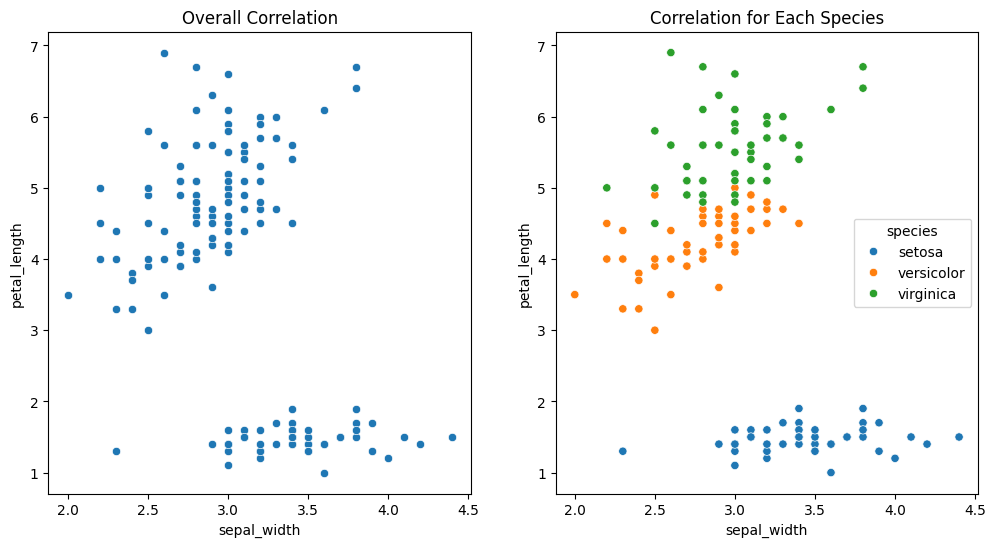

In [52]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Overall correlation
plt.subplot(1, 2, 1)
sns.scatterplot(data=iris, x='sepal_width', y='petal_length')
plt.title('Overall Correlation')

# Correlation for each species
plt.subplot(1, 2, 2)
sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='species')
plt.title('Correlation for Each Species')

plt.show()


The overall correlation between sepal_width and petal_length is negative because different species have different relationships between variables. When we look at each species separately, their unique characteristics can result in positive correlations between variables within each species. Each species has its own traits that influence how the variables are correlated.